Anisha Gharat

BE Comps Batch E

Roll no. 68

UID : 2018230071

# **EXPERIMENT NO. 6**

**Objective :** To implement an expert system for decision making using Fuzzy Logic/ genetic algorithm.

**Aim :** Use Fuzzy Logic System to find car price in off-lease car sale problem using the following data -

The input membership function for “mileage,” is

    μ HighMilege (x) = 0           if  x ≥ 0 and x ≤ 50000
                     = 1           if  x ≥ 100000 and x ≤ 140000
                     = m           if  x > 50000 and x < 100000

    μ LowMilege (x)  = 0           if  x ≥ 100000 and x ≤ 140000
                     = 1           if x ≥ 0 and x ≤ 50000
                     = n           if x > 50000 and x < 100000

The input membership function for “damage level,” is

    μ HeavyDamageLevel (x)  = 0           if x ≥ 0 and x ≤ 3
                            = 1           if x ≥ 7 and x ≤ 10
                            = r           if x > 3 and x < 7

    μ LightDamageLevel (x)  = 0           if x ≥ 7 and x ≤ 10
                            = 1           if x ≥ 0 and x ≤ 3
                            = s           if x > 3 and x < 7

The output membership function for “car sale price,” is

    μ GoodSale (x) = 0         if  x ≥ 0 and x ≤ 5000
                   = 1         if  x ≥ 15000 and x ≤ 20000
                   = u         if  x > 5000 and x < 15000

    μ BadSale(x) = 1           if  x ≥ 0 and x ≤ 5000
                 = 0           if  x ≥ 15000 and x ≤ 20000
                 = v           if  x > 5000 and x < 15000

The fuzzy rules are as follows:

Rule 1: If damage level is heavy and mileage is high, then sale price is bad

Rule 2: If damage level is light and mileage is low, then sale price is good

Find the values of m, n, r and s in the above membership function using given Chapter 7 of Book No. 1 (Page No. 122-123). Apply fuzzification process, Inferencing of the rules and then de-fuzzification process to find the car prices when the input given are Mileage and damage level.

**Code :**

In [1]:
!pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.4.2)


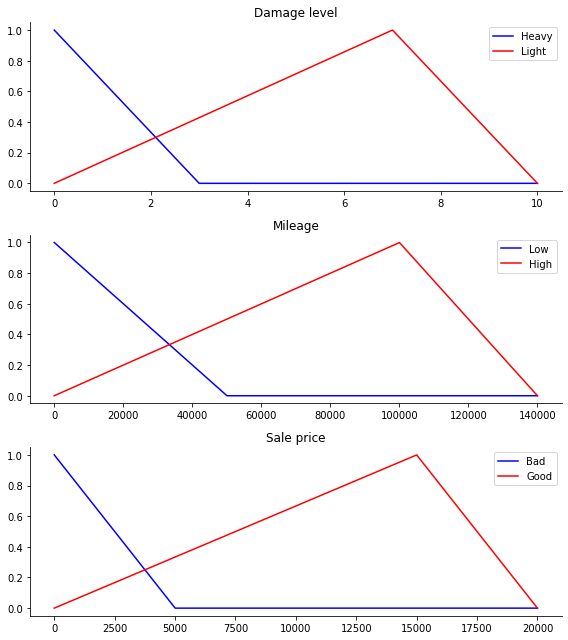

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
# Generate universe variables
damage = np.arange(0, 11, 1) #damage range
mileage = np.arange(0, 140001, 1) #mileage range
price = np.arange(0, 20001, 1) #price range
# Generate fuzzy membership functions
damage_lo = fuzz.trimf(damage, [0, 0, 3])
damage_hi = fuzz.trimf(damage, [0, 7, 10])

mileage_lo = fuzz.trimf(mileage, [0, 0, 50000])
mileage_hi = fuzz.trimf(mileage, [0, 100000, 140000])

price_lo = fuzz.trimf(price, [0, 0, 5000])
price_hi = fuzz.trimf(price, [0, 15000, 20000])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
ax0.plot(damage, damage_lo, 'b', linewidth=1.5, label='Heavy')
ax0.plot(damage, damage_hi, 'r', linewidth=1.5, label='Light')
ax0.set_title('Damage level')
ax0.legend()
ax1.plot(mileage, mileage_lo, 'b', linewidth=1.5, label='Low')
ax1.plot(mileage, mileage_hi, 'r', linewidth=1.5, label='High')
ax1.set_title('Mileage')
ax1.legend()
ax2.plot(price, price_lo, 'b', linewidth=1.5, label='Bad')
ax2.plot(price, price_hi, 'r', linewidth=1.5, label='Good')
ax2.set_title('Sale price')
ax2.legend()
# Turn off top/right axes
for ax in (ax0, ax1, ax2):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
plt.tight_layout()

Damage level:
Light-  0.0
Heavy- 0.5714285714285714

Mileage:
Low-  0.0
High-  0.8


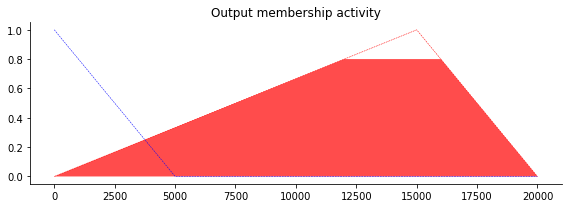

In [3]:
# We need the activation of our fuzzy membership functions at these values.
# The user input values that don't exist in our universes...
# This is what fuzz.interp_membership exists for!
damage_level_lo = fuzz.interp_membership(damage, damage_lo, 4)
damage_level_hi = fuzz.interp_membership(damage, damage_hi, 4)
print("Damage level:")
print("Light- ",damage_level_lo)
print("Heavy-",damage_level_hi)
print()
mileage_level_lo = fuzz.interp_membership(mileage, mileage_lo, 80000)
mileage_level_hi = fuzz.interp_membership(mileage, mileage_hi, 80000)
print("Mileage:")
print("Low- ",mileage_level_lo)
print("High- ",mileage_level_hi)
# Now we take our rules and apply them. 
#Rule 1 concerns Heavy damage OR High mileage.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(damage_level_lo, mileage_level_lo)
# Now we apply this by clipping the top off the corresponding output membership function with `np.fmin`
price_activation_lo = np.fmin(active_rule1, price_lo) # removed entirely to 0
# For rule 2 we connect high mileage OR heavy damage with high pricing
active_rule2 = np.fmax(damage_level_hi, mileage_level_hi)
price_activation_hi = np.fmin(active_rule2, price_hi)
price0 = np.zeros_like(price)
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(price, price0, price_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(price, price_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(price, price0, price_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(price, price_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')
# Turn off top/right axes
for ax in (ax0,):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
plt.tight_layout()

Predicted Sale price:  11555.55555555477


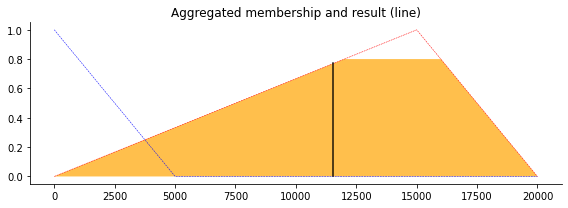

In [4]:
# Aggregate all output membership functions together
aggregated = np.fmax(price_activation_lo, price_activation_hi)
# Calculate defuzzified result
salesprice = fuzz.defuzz(price, aggregated, 'centroid')
price_activation = fuzz.interp_membership(price, aggregated, salesprice) # for plot
print("Predicted Sale price: ",salesprice)
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(price, price_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(price, price_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(price, price0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([salesprice, salesprice], [0, price_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')
# Turn off top/right axes
for ax in (ax0,):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
plt.tight_layout()

## **Conclusion :** 
Through this lab, we learned the concept of Fuzzy Logic and how we can get more precise predictions rather than just Boolean values using Fuzzy Logic. We studied the entire structure of the Fuzzy system - Fuzzifiers, Inference system and Defuzzifier and also implemented it for generating the predicted sale price. Using the input membership functions of "Mileage" and "Damage levels" we also plotted the Triangular membership function. Then we found the values of m, n, r and s in the above membership function. After that we applied the given rules and aggregated them both. Lastly, we calculated the defuzzified result to get the predicted sale price of a car. Hence, we successfully implemented an expert system for decision making using Fuzzy Logic.

# **Another Simple Approach**

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
damage = ctrl.Antecedent(np.arange(0, 11, 1), 'damage')
mileage = ctrl.Antecedent(np.arange(0, 140001, 1), 'mileage')
price = ctrl.Consequent(np.arange(0, 20001, 1), 'price')

# Auto-membership function population is possible with .automf(3, 5, or 7)
damage.automf(3)
mileage.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
price['low'] = fuzz.trimf(price.universe, [0, 5000, 15000])
#price['medium'] = fuzz.trimf(price.universe, [0, 5000, 15000])
price['high'] = fuzz.trimf(price.universe, [5000, 15000, 20000])

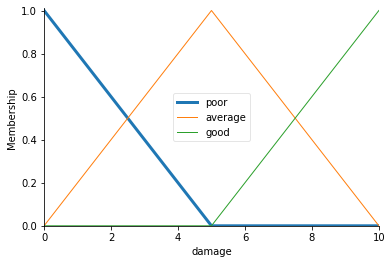

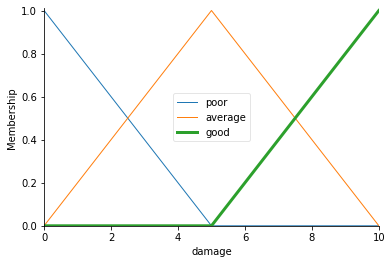

In [6]:
# You can see how these look with .view()
damage['poor'].view()
damage['good'].view()

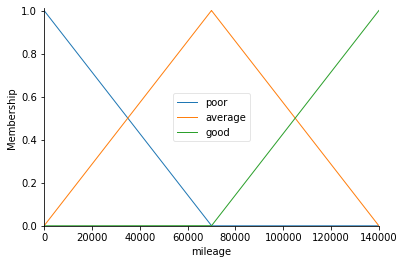

In [7]:
mileage.view()

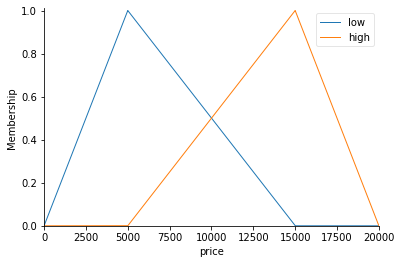

In [8]:
price.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcc83fd1320>)

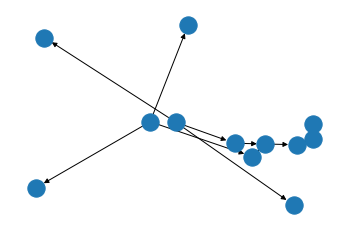

In [9]:
rule1 = ctrl.Rule(damage['good'] | mileage['good'], price['high'])
#rule2 = ctrl.Rule(mileage['average'], price['medium'])
rule3 = ctrl.Rule(mileage['poor'] | damage['poor'], price['low'])

rule1.view()

In [10]:
price_ctrl = ctrl.ControlSystem([rule1, rule3])

In [11]:
pricing = ctrl.ControlSystemSimulation(price_ctrl)

In [12]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
pricing.input['damage'] = 4
pricing.input['mileage'] = 80000

# Crunch the numbers
pricing.compute()

Predicted Sale price:  9399.966361700326


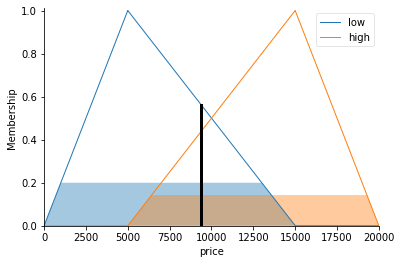

In [13]:
print("Predicted Sale price: ",pricing.output['price'])
price.view(sim=pricing)